# Kuramoto-Sivashinksy vs. Swift-Hohenberg

In [1]:
function ksintegrate(u, Lx, dt, Nt, nsave)
    
    Nx = length(u)                  # number of gridpoints
    x = collect(0:(Nx-1)/Nx)*Lx
    kx = vcat(0:Nx/2-1, 0, -Nx/2+1:-1)  # integer wavenumbers: exp(2*pi*kx*x/L)
    @show kx
    alpha = 2*pi*kx/Lx              # real wavenumbers:    exp(alpha*x)
    D = 1im*alpha;                  # D = d/dx operator in Fourier space
    L = alpha.^2 - alpha.^4         # linear operator -D^2 - D^4 in Fourier space
    G = -0.5*D                      # -1/2 D operator in Fourier space
    
    Nsave = div(Nt, nsave)+1        # number of saved time steps, including t=0
    t = (0:Nsave)*(dt*nsave)        # t timesteps
    U = zeros(Nsave, Nx)            # matrix of u(xⱼ, tᵢ) values
    U[1,:] = u                      # assign initial condition to U
    s = 2                           # counter for saved data
    
    dt2  = dt/2
    dt32 = 3*dt/2;
    A_inv = (ones(Nx) - dt2*L).^(-1)
    B     =  ones(Nx) + dt2*L

    Nn  = G.*fft(u.*u) # -u u_x (spectral), notation Nn = N^n     = N(u(n dt))
    Nn1 = copy(Nn)     #                   notation Nn1 = N^{n-1} = N(u((n-1) dt))
    u  = fft(u)        # transform u to spectral

    # timestepping loop
    for n = 1:Nt
        Nn1 = copy(Nn)                 # shift nonlinear term in time: N^{n-1} <- N^n
        Nn  = G.*fft(real(ifft(u)).^2) # compute Nn = -u u_x

        u = A_inv .* (B .* u + dt32*Nn - dt2*Nn1)
        
        if mod(n, nsave) == 0
            U[s,:] = real(ifft(u))
            s += 1            
        end
    end

    t,U
end

ksintegrate (generic function with 1 method)

┌ Info: Recompiling stale cache file /home/aghor/.julia/compiled/v1.1/FFTW/PvIn2.ji for FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/aghor/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


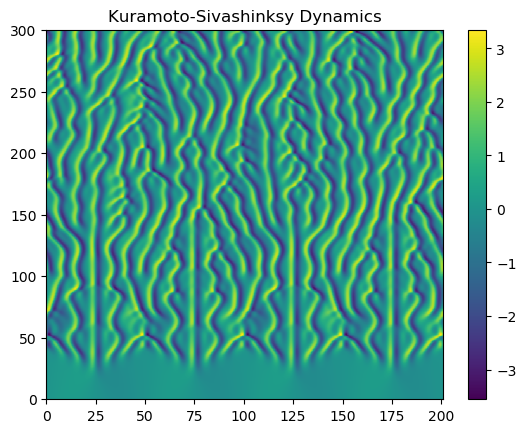

kx = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0

PyObject Text(0.5, 1.0, 'Kuramoto-Sivashinksy Dynamics')

In [2]:
using FFTW
using PyPlot

Lx = 64*pi
Nx = 1024
dt = 1/16
nsave = 8
Nt = 4800

x = Lx*(0:Nx-1)/Nx
u = 0.01 * cos.(x/16) + 0.2 * sin.(x/8)  + 0.0001 * cos.(2*pi/Lx*x)
t,U = ksintegrate(u, Lx, dt, Nt, nsave)
pcolor(x,t,U)
colorbar()
title("Kuramoto-Sivashinksy Dynamics")

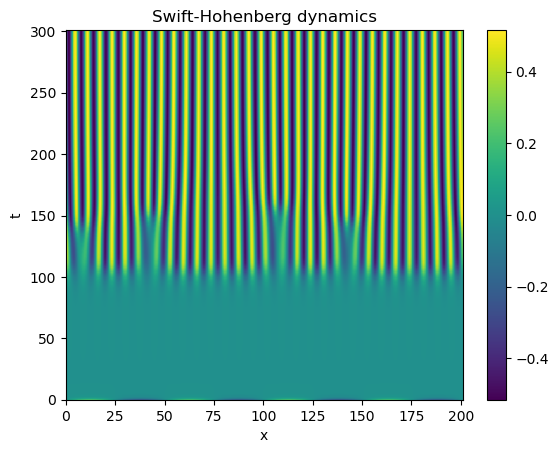

PyObject Text(0.5, 1.0, 'Swift-Hohenberg dynamics')

In [13]:
using FFTW
using PyPlot

Lx = 64*pi
Nx = 1024
dt = 1/16
nsave = 16
Nt = 4800
r = 0.2

x = Lx*(0:Nx-1)/Nx
u = 0.01* cos.(x/16) + 0.2 *sin.(x/8)  + 0.0001*cos.(2*pi*x/Lx)
t,U = shintegrate(r, u, Lx, dt, Nt, nsave)
pcolor(x,t,U)
xlim(x[1], x[end])
ylim(t[1], t[end])
xlabel("x")
ylabel("t")
colorbar()
title("Swift-Hohenberg dynamics")

## K-S vs S-H

* The first conspicuous difference between the KS and SH plots is that while the KS plot looks chaotic, SH plot is regular. I can compare and contrast the two equations as follows: KS has a $u u_{x}$ term that supports waves and also, KS equation is equivariant with respect to $\gamma_{o}$ (odd-) symmetry ($\gamma_{o} u(x) \rightarrow -u(-x)$). On the other hand SH is symmetric under both even ($\gamma_{e}$) and odd ($\gamma_{o}$) symmetries, where $\gamma_{e} u(x) \rightarrow u(-x)$. Because SH equation commutes with both even ($\gamma_{e}$) and odd ($\gamma_{o}$) symmetries, there is no chance of supporting a traveling wave. 

* Also, the Lyapunov functional $\bigg(V = \int_{0}^{L_{x}}-\frac{1}{2} r u^{2} + \frac{1}{4} u^{4} + \frac{1}{2} (u_{xx} + u)^{2} dx \bigg)$ for the SH equation tells that $\frac{dV}{dt} \leq 0$, implying that the ultimate fate of a solution of the SH equation is to settle down in a steady state, which is what we see.

* In both KS and SH plots, we observe that for some time, the amplitudes of the solution are low. For KS, the time is around $t \approx 25$ while for SH, that time is around $t \approx 100$. After that, the amplitudes are no longer small. I can say that the nonlinearities in the equations stop the growth and saturate the amplitudes to $O(1)$ quantities.

* In SH, I can guess that the presence of super-diffusive term makes it difficult to reach finite amplitudes of the solutions and the hence it takes time for nonlinearities to kick in and saturate the amplitude.